<a href="https://colab.research.google.com/github/nura6199/my-dissertation/blob/main/My_EnsembleHybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chronic_kidney_disease.csv to chronic_kidney_disease.csv


In [4]:
# Load the dataset
data = pd.read_csv('chronic_kidney_disease.csv')

 Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

In [5]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [6]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

 Explore the data.
 How much of the data is missing from each column?

In [7]:
data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.shape

(400, 25)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [11]:
data.describe()

,rbc,pc,pcc,ba,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.117500,0.190000,0.885000,0.935000,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500
std,0.322418,0.392792,0.319421,0.246835,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd


In [13]:
data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

preprocessing steps

The new columns have no NaN values, so we'll drop the original columns and use the newly filled columns.

A new dataframe will be created with the filled columns

In [14]:
# Handling missing values
data = data.replace('?', pd.NA)
data = data.dropna()


In [15]:
# Convert categorical variables to numerical using LabelEncoder
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [16]:
data.shape

(228, 25)

In [17]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,0
5,60,90,1.015,3,0,0,0,1,1,74,...,39,7800,4.4,0,0,1,1,0,1,0
6,68,70,1.01,0,0,0,0,1,1,100,...,36,0,0.0,1,1,1,1,1,1,0
9,53,90,1.02,2,0,1,1,0,1,70,...,29,12100,3.7,0,0,1,0,1,0,0
11,63,70,1.01,3,0,1,1,0,1,380,...,32,4500,3.8,0,0,1,0,0,1,0


In [18]:
# Separate features and labels
X = data.drop('class', axis=1)
y = data['class']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature Selection using Extra Trees Classifier:
We will use the Extra Trees Classifier to select important features from the dataset.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees Classifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [22]:
# Fit the model and get feature importances
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [25]:
# Select important features
important_features_indices = et_clf.feature_importances_.argsort()[::-1]
important_features = X.columns[important_features_indices]
num_features_to_select = 10  # You can choose any number of top feature

In [26]:
# Select the top 'num_features_to_select' features
selected_features = important_features[:num_features_to_select]

In [27]:
# Filter the data to keep only the selected features
X_train_selected = X_train[:, important_features_indices[:num_features_to_select]]
X_test_selected = X_test[:, important_features_indices[:num_features_to_select]]

<ipython-input-28-98bd512aa464>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


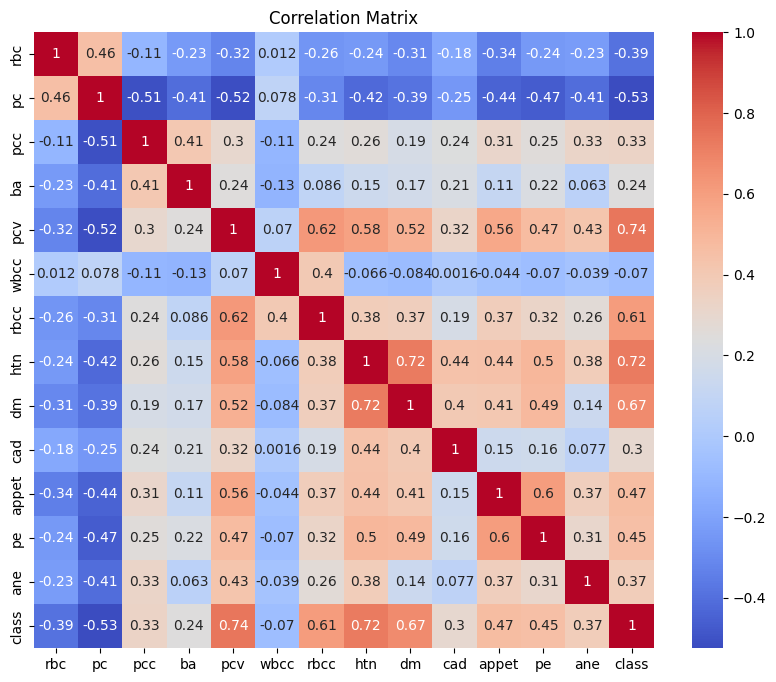

In [28]:
# Plot the correlation matrix using a heatmap
import seaborn as sns
import seaborn as sns
# Compute the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

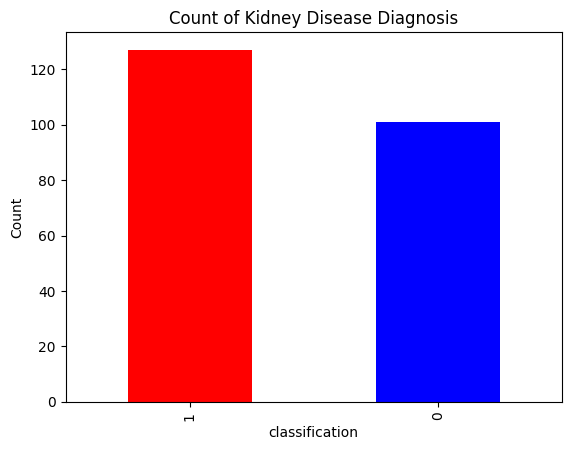

In [29]:
data['class'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Count of Kidney Disease Diagnosis")
plt.xlabel("classification")
plt.ylabel("Count")
plt.show()

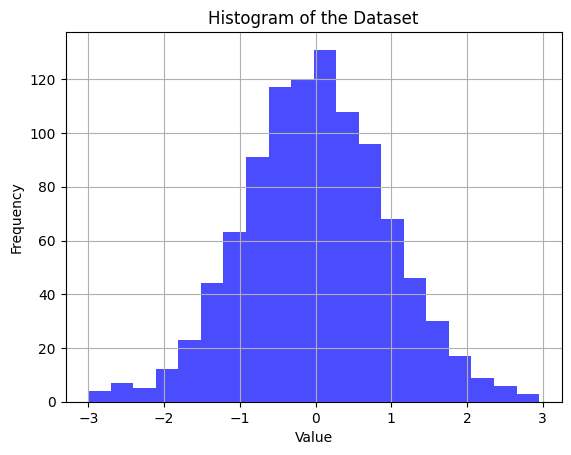

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your dataset)
data = np.random.randn(1000)  # Replace with your dataset

# Create a histogram
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Dataset')
plt.grid(True)
plt.show()


mplementing Naive Bayes, SVM, and Decision Tree classifiers:

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [33]:
# Initialize classifiers
nb_clf = GaussianNB()
svm_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

In [34]:
# Train and predict using Naive Bayes
nb_clf.fit(X_train_selected, y_train)
nb_y_pred = nb_clf.predict(X_test_selected)

In [35]:
# Train and predict using Decision Tree
dt_clf.fit(X_train_selected, y_train)
dt_y_pred = dt_clf.predict(X_test_selected)

In [36]:
# Train and predict using SVM
svm_clf.fit(X_train_selected, y_train)
svm_y_pred = svm_clf.predict(X_test_selected)

classifier's classification report

In [37]:
#Naive bayes classification report
from sklearn.metrics import classification_report
nb_y_pred = nb_clf.predict(X_test_selected)
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        31

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



In [38]:
#Decision tree classification report
from sklearn.metrics import classification_report
dt_y_pred = dt_clf.predict(X_test_selected)
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



In [39]:
#SVM classification report
from sklearn.metrics import classification_report
Svm_y_pred = svm_clf.predict(X_test_selected)
print(classification_report(y_test, Svm_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate accuracy for each classifier
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1_score = f1_score(y_test, nb_y_pred)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1_score = f1_score(y_test, svm_y_pred)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1_score = f1_score(y_test, dt_y_pred)

In [41]:
# Generate confusion matrix for each classifier
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

In [42]:
# Generate ROC curve and calculate ROC-AUC score for each classifier
nb_y_prob = nb_clf.predict_proba(X_test_selected)[:, 1]
svm_y_prob = svm_clf.predict_proba(X_test_selected)[:, 1]
dt_y_prob = dt_clf.predict_proba(X_test_selected)[:, 1]

nb_roc_auc = roc_auc_score(y_test, nb_y_prob)
svm_roc_auc = roc_auc_score(y_test, svm_y_prob)
dt_roc_auc = roc_auc_score(y_test, dt_y_prob)

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_y_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_y_prob)

Implementing Hybrid Ensemble Learning: For hybrid ensemble learning, we'll combine the predictions of Naive Bayes, SVM, and Decision Tree using a voting classifier.

In [43]:
from sklearn.ensemble import VotingClassifier

# Create the voting ensemble
voting_clf = VotingClassifier(estimators=[('nb', nb_clf), ('svm', svm_clf), ('dt', dt_clf)], voting='soft')

In [44]:
# Train and predict using the voting ensemble
voting_clf.fit(X_train_selected, y_train)
voting_y_pred = voting_clf.predict(X_test_selected)

In [45]:
#hybrid ensemble classification report
from sklearn.metrics import classification_report
voting_y_pred = voting_clf.predict(X_test_selected)
print(classification_report(y_test, voting_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



In [47]:
# Calculate accuracy for the voting ensemble
voting_accuracy = accuracy_score(y_test, voting_y_pred)

# Calculate precision for the voting ensemble
voting_precision = precision_score(y_test, voting_y_pred)

# Calculate recall for the voting ensemble
voting_recall = recall_score(y_test, voting_y_pred)

# Calculate F1-score for the voting ensemble
voting_f1_score = f1_score(y_test, voting_y_pred)

In [48]:
# Generate confusion matrix for the voting ensemble
voting_conf_matrix = confusion_matrix(y_test, voting_y_pred)

In [51]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
nb_cv_precision = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='precision')
nb_cv_recall = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='recall')
nb_cv_f1_score = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_cv_precision = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='precision')
svm_cv_recall = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='recall')
svm_cv_f1_score = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
dt_cv_precision = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='precision')
dt_cv_recall = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='recall')
dt_cv_f1_score = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Voting Ensemble
voting_cv_scores = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
voting_cv_precision = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='precision')
voting_cv_recall = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='recall')
voting_cv_f1_score = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Print the average cross-validation scores for each classifier
print("Cross-Validation Results:")
print("Naive Bayes:")
print(f"Accuracy: {nb_cv_scores.mean():.2f}")
print(f"Precision: {nb_cv_precision.mean():.2f}")
print(f"Recall: {nb_cv_recall.mean():.2f}")
print(f"F1-score: {nb_cv_f1_score.mean():.2f}")
print()

print("SVM:")
print(f"Accuracy: {svm_cv_scores.mean():.2f}")
print(f"Precision: {svm_cv_precision.mean():.2f}")
print(f"Recall: {svm_cv_recall.mean():.2f}")
print(f"F1-score: {svm_cv_f1_score.mean():.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_cv_scores.mean():.2f}")
print(f"Precision: {dt_cv_precision.mean():.2f}")
print(f"Recall: {dt_cv_recall.mean():.2f}")
print(f"F1-score: {dt_cv_f1_score.mean():.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_cv_scores.mean():.2f}")
print(f"Precision: {voting_cv_precision.mean():.2f}")
print(f"Recall: {voting_cv_recall.mean():.2f}")
print(f"F1-score: {voting_cv_f1_score.mean():.2f}")

Cross-Validation Results:
Naive Bayes:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-score: 0.96

SVM:
Accuracy: 0.97
Precision: 0.99
Recall: 0.96
F1-score: 0.97

Decision Tree:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-score: 0.99

Voting Ensemble:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98


In [52]:
# Generate ROC curve and calculate ROC-AUC score for the voting ensemble
voting_y_prob = voting_clf.predict_proba(X_test_selected)[:, 1]
voting_roc_auc = roc_auc_score(y_test, voting_y_prob)
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_y_prob)

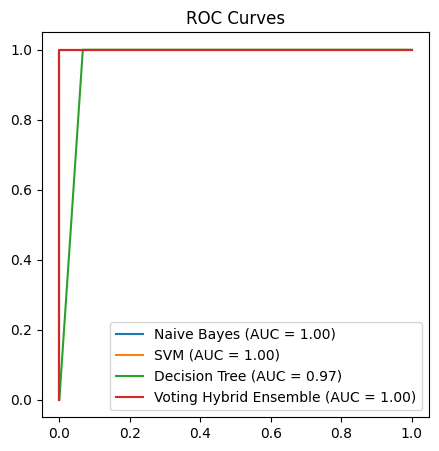

In [53]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(5, 5))
plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Hybrid Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()



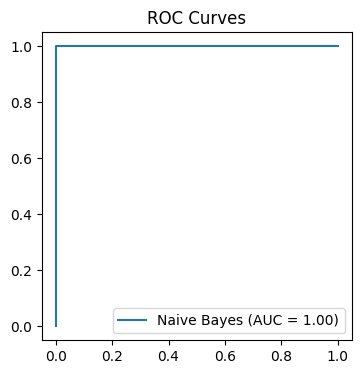

In [54]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

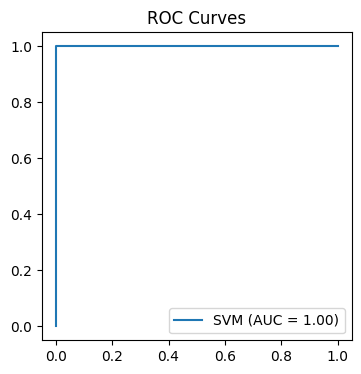

In [55]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

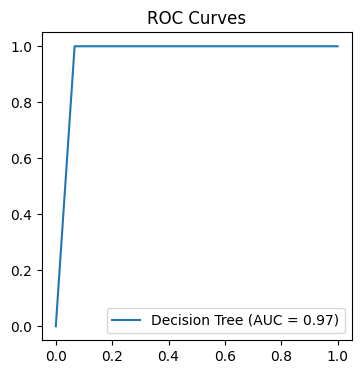

In [56]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
#plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

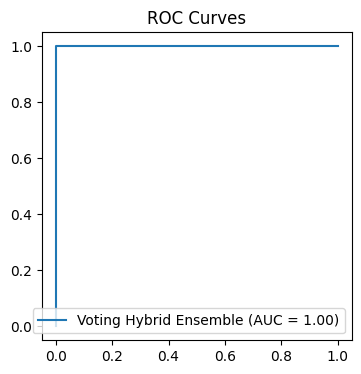

In [57]:
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(4, 4))
#plot_roc_curve(fpr_nb, tpr_nb, nb_roc_auc, 'Naive Bayes')
#plot_roc_curve(fpr_svm, tpr_svm, svm_roc_auc, 'SVM')
#plot_roc_curve(fpr_dt, tpr_dt, dt_roc_auc, 'Decision Tree')
plot_roc_curve(fpr_voting, tpr_voting, voting_roc_auc, 'Voting Hybrid Ensemble')
#plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Random Guessing')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
#plt.grid()
plt.show()

In [58]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['Not CKD', 'CKD'])  # Complete the line to add 'CKD' label
    plt.yticks([0, 1], ['Not CKD', 'CKD'])  # Add y-axis labels as well
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



In [59]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['Not CKD', 'CKD'])  # Complete the line to add 'CKD' label
    plt.yticks([0, 1], ['Not CKD', 'CKD'])  # Add y-axis labels as well
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        31

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



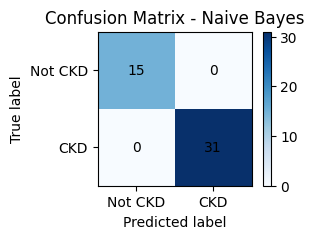

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



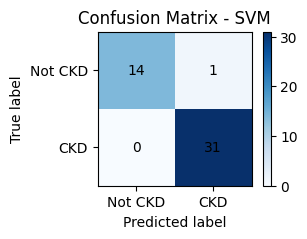

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



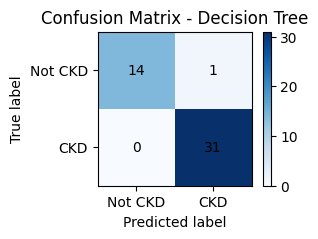

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



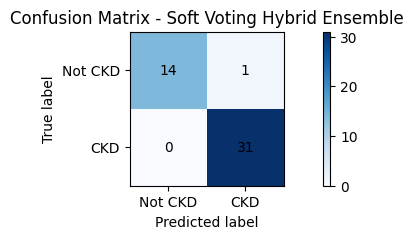

In [60]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], ['Not CKD', 'CKD'])
    plt.yticks([0, 1], ['Not CKD', 'CKD'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)

    # Annotate the confusion matrix cells with values
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", verticalalignment="center")

    plt.show()

#Naive bayes classification report
from sklearn.metrics import classification_report
nb_y_pred = nb_clf.predict(X_test_selected)
print(classification_report(y_test, nb_y_pred))


# Plot confusion matrices

plt.figure(figsize=(10, 2))
plt.subplot(1, 3, 1)
plot_confusion_matrix(nb_conf_matrix, title='Confusion Matrix - Naive Bayes')

#SVM classification report
from sklearn.metrics import classification_report
Svm_y_pred = svm_clf.predict(X_test_selected)
print(classification_report(y_test, Svm_y_pred))

# Plot confusion matrices
plt.figure(figsize=(10, 2))
plt.subplot(1, 3, 1)
plot_confusion_matrix(svm_conf_matrix, title='Confusion Matrix - SVM')

#Decision tree classification report
from sklearn.metrics import classification_report
dt_y_pred = dt_clf.predict(X_test_selected)
print(classification_report(y_test, dt_y_pred))

# Plot confusion matrices
plt.figure(figsize=(10, 2))
plt.subplot(1, 3, 3)
plot_confusion_matrix(dt_conf_matrix, title='Confusion Matrix - Decision Tree')


#clssification report for Hybrid ensemble
from sklearn.metrics import classification_report
voting_y_pred = voting_clf.predict(X_test_selected)
print(classification_report(y_test, voting_y_pred))

# Plot confusion matrices
plt.figure(figsize=(10, 2))
plot_confusion_matrix(voting_conf_matrix, title='Confusion Matrix - Soft Voting Hybrid Ensemble')

In [ ]:
#clssification report for Hybrid ensemble
from sklearn.metrics import classification_report
voting_y_pred = voting_clf.predict(X_test_selected)
print(classification_report(y_test, voting_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        31

    accuracy                           0.98        46
   macro avg       0.98      0.97      0.97        46
weighted avg       0.98      0.98      0.98        46



In [61]:
# Print accuracy, precision, recall, and F1-score for each classifier
print("Naive Bayes:")
print(f"Accuracy: {nb_accuracy:.2f}")
print(f"Precision: {nb_precision:.2f}")
print(f"Recall: {nb_recall:.2f}")
print(f"F1-score: {nb_f1_score:.2f}")
print()

print("SVM:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-score: {svm_f1_score:.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-score: {dt_f1_score:.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_accuracy:.2f}")
print(f"Precision: {voting_precision:.2f}")
print(f"Recall: {voting_recall:.2f}")
print(f"F1-score: {voting_f1_score:.2f}")


Naive Bayes:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

SVM:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98

Decision Tree:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98

Voting Ensemble:
Accuracy: 0.98
Precision: 0.97
Recall: 1.00
F1-score: 0.98


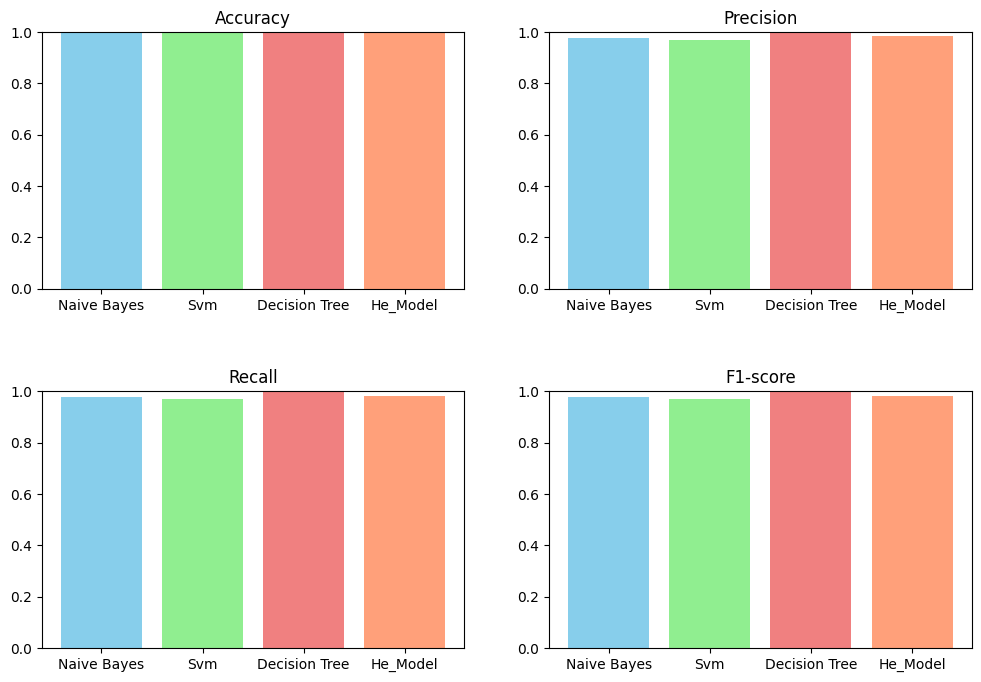

In [93]:
import matplotlib.pyplot as plt

# Data for each metric
accuracy_scores = [nb_accuracy, svm_accuracy, dt_accuracy, voting_accuracy]
precision_scores = [nb_precision, svm_precision, dt_precision, voting_precision]
recall_scores = [nb_recall, svm_recall, dt_recall, voting_recall]
f1_scores = [nb_f1_score, svm_f1_score, dt_f1_score, voting_f1_score]

# Original labels for the classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', 'HE_Model']

# Capitalize the classifier names
classifiers_capitalized = [classifier.title() for classifier in classifiers]

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Plot histograms for each metric
for i, metric_name in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-score']):
    row, col = i // 2, i % 2
    axes[row, col].bar(classifiers_capitalized, [accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]], color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
    axes[row, col].set_title(metric_name)
    axes[row, col].set_ylim(0, 1)

# Display the histograms
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
nb_cv_precision = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='precision')
nb_cv_recall = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='recall')
nb_cv_f1_score = cross_val_score(nb_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
svm_cv_precision = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='precision')
svm_cv_recall = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='recall')
svm_cv_f1_score = cross_val_score(svm_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
dt_cv_precision = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='precision')
dt_cv_recall = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='recall')
dt_cv_f1_score = cross_val_score(dt_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Cross-validation for Voting Ensemble
voting_cv_scores = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='accuracy')
voting_cv_precision = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='precision')
voting_cv_recall = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='recall')
voting_cv_f1_score = cross_val_score(voting_clf, X_train_selected, y_train, cv=5, scoring='f1')

# Print the average cross-validation scores for each classifier
print("Cross-Validation Results:")
print("Naive Bayes:")
print(f"Accuracy: {nb_cv_scores.mean():.2f}")
print(f"Precision: {nb_cv_precision.mean():.2f}")
print(f"Recall: {nb_cv_recall.mean():.2f}")
print(f"F1-score: {nb_cv_f1_score.mean():.2f}")
print()
#Naive bayes classification report
from sklearn.metrics import classification_report
nb_y_pred = nb_clf.predict(X_test_selected)
print(classification_report(y_test, nb_y_pred))

print("SVM:")
print(f"Accuracy: {svm_cv_scores.mean():.2f}")
print(f"Precision: {svm_cv_precision.mean():.2f}")
print(f"Recall: {svm_cv_recall.mean():.2f}")
print(f"F1-score: {svm_cv_f1_score.mean():.2f}")
print()

print("Decision Tree:")
print(f"Accuracy: {dt_cv_scores.mean():.2f}")
print(f"Precision: {dt_cv_precision.mean():.2f}")
print(f"Recall: {dt_cv_recall.mean():.2f}")
print(f"F1-score: {dt_cv_f1_score.mean():.2f}")
print()

print("Voting Ensemble:")
print(f"Accuracy: {voting_cv_scores.mean():.2f}")
print(f"Precision: {voting_cv_precision.mean():.2f}")
print(f"Recall: {voting_cv_recall.mean():.2f}")
print(f"F1-score: {voting_cv_f1_score.mean():.2f}")


Cross-Validation Results:
Naive Bayes:
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-score: 0.96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        31

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

SVM:
Accuracy: 0.97
Precision: 0.99
Recall: 0.96
F1-score: 0.97

Decision Tree:
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1-score: 0.99

Voting Ensemble:
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98


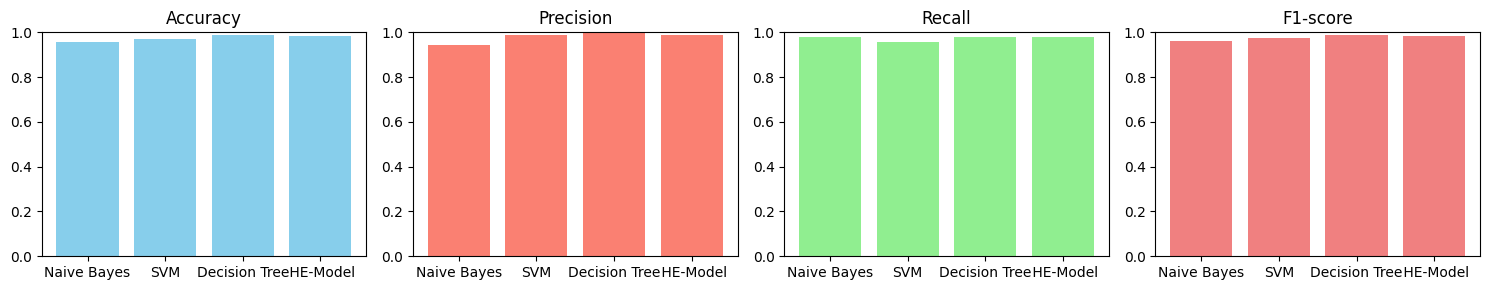

In [67]:
import matplotlib.pyplot as plt

# Cross-validation results for each classifier
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', " " 'HE-Model']

# Create subplots for each metric
plt.figure(figsize=(15, 3))

# Accuracy histogram
plt.subplot(1, 4, 1)
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

# Precision histogram
plt.subplot(1, 4, 2)
plt.bar(classifiers, precision_scores, color='salmon')
plt.title('Precision')
plt.ylim(0, 1)

# Recall histogram
plt.subplot(1, 4, 3)
plt.bar(classifiers, recall_scores, color='lightgreen')
plt.title('Recall')
plt.ylim(0, 1)

# F1-score histogram
plt.subplot(1, 4, 4)
plt.bar(classifiers, f1_scores, color='lightcoral')
plt.title('F1-score')
plt.ylim(0, 1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


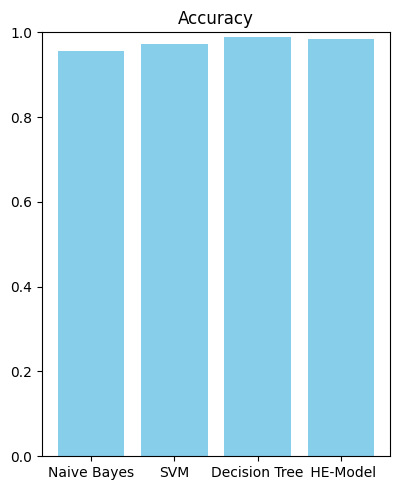

In [70]:
import matplotlib.pyplot as plt

# Cross-validation results for each classifier
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', " " 'HE-Model']

# Create subplots for each metric
plt.figure(figsize=(15, 5))

# Accuracy histogram
plt.subplot(1, 4, 1)
plt.bar(classifiers, accuracy_scores, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)






# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


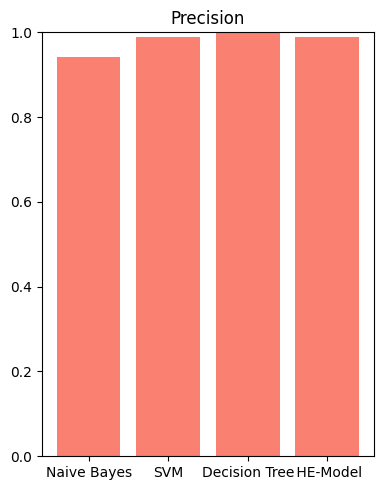

In [72]:
import matplotlib.pyplot as plt

# Cross-validation results for each classifier
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', " " 'HE-Model']

# Create subplots for each metric
plt.figure(figsize=(15, 5))



# Precision histogram
plt.subplot(1, 4, 2)
plt.bar(classifiers, precision_scores, color='salmon')
plt.title('Precision')
plt.ylim(0, 1)



# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


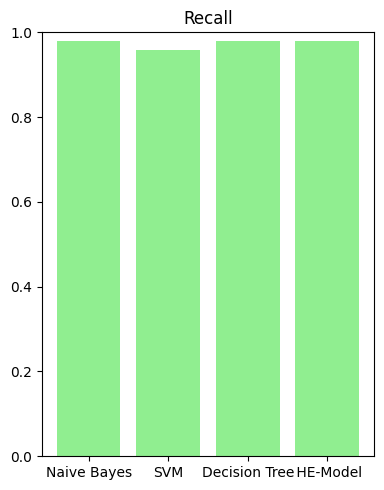

In [77]:
import matplotlib.pyplot as plt

# Cross-validation results for each classifier
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', " " 'HE-Model']

# Create subplots for each metric
plt.figure(figsize=(15, 5))



# Recall histogram
plt.subplot(1, 4, 2)
plt.bar(classifiers, recall_scores, color='lightgreen')
plt.title('Recall')
plt.ylim(0, 1)



# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


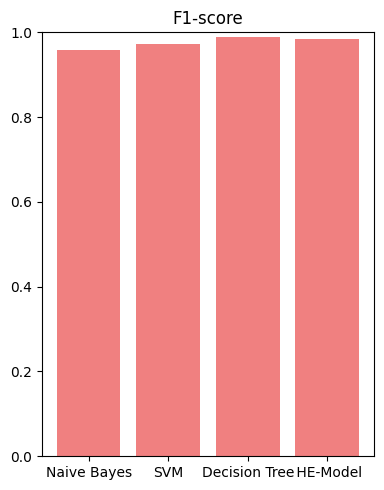

In [81]:
import matplotlib.pyplot as plt

# Cross-validation results for each classifier
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', " " 'HE-Model']

# Create subplots for each metric
plt.figure(figsize=(15, 5))




# F1-score histogram
plt.subplot(1, 4, 4)
plt.bar(classifiers, f1_scores, color='lightcoral')
plt.title('F1-score')
plt.ylim(0, 1)

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


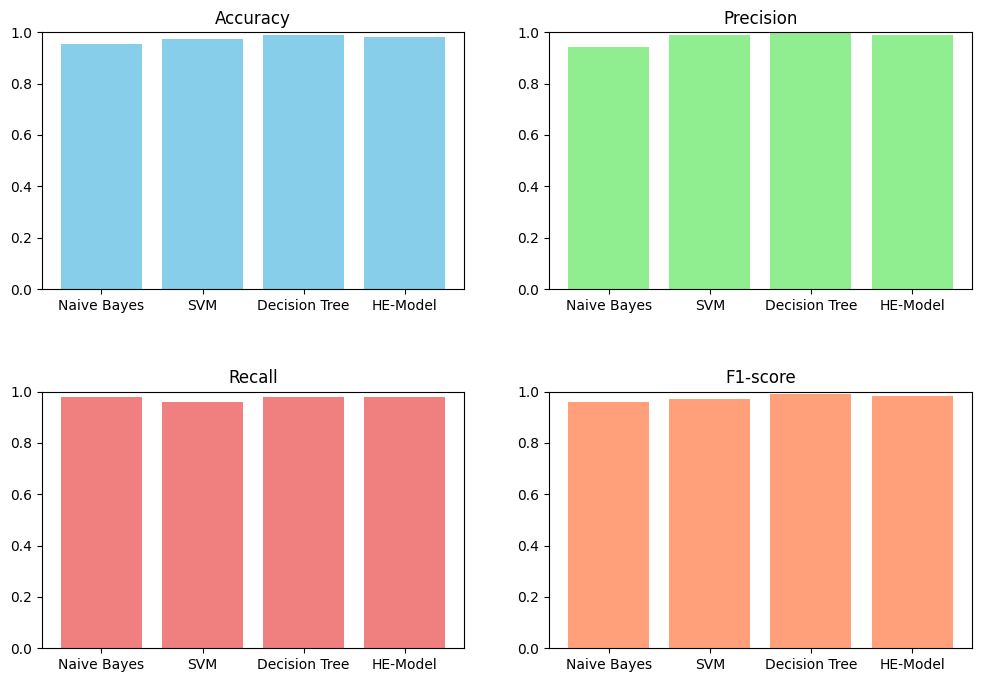

In [84]:
import matplotlib.pyplot as plt

# Cross-validation results
accuracy_scores = [nb_cv_scores.mean(), svm_cv_scores.mean(), dt_cv_scores.mean(), voting_cv_scores.mean()]
precision_scores = [nb_cv_precision.mean(), svm_cv_precision.mean(), dt_cv_precision.mean(), voting_cv_precision.mean()]
recall_scores = [nb_cv_recall.mean(), svm_cv_recall.mean(), dt_cv_recall.mean(), voting_cv_recall.mean()]
f1_scores = [nb_cv_f1_score.mean(), svm_cv_f1_score.mean(), dt_cv_f1_score.mean(), voting_cv_f1_score.mean()]

# Labels for the classifiers
classifiers = ['Naive Bayes', 'SVM', 'Decision Tree', 'HE-Model']

# Plot histograms for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Accuracy
axes[0, 0].bar(classifiers, accuracy_scores, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Precision
axes[0, 1].bar(classifiers, precision_scores, color='lightgreen')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

# Recall
axes[1, 0].bar(classifiers, recall_scores, color='lightcoral')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

# F1-score
axes[1, 1].bar(classifiers, f1_scores, color='lightsalmon')
axes[1, 1].set_title('F1-score')
axes[1, 1].set_ylim(0, 1)

# Show the plots
plt.show()
